In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from math import modf, pi, sin, cos
class angle():
    def __init__(self, gradi, primi):
        self.gradi = gradi
        self.primi = primi
    def rad(self):
        a = self.gradi
        b = self.primi/60
        return (a+b)*pi/180
    def sin(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return sin(c)
    def cos(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return cos(c)
    def somma(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 + c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def diff(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 - c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def opposto(self):
        return angle(-self.gradi, -self.primi)
    def __str__(self):
        return '{:.0f}'.format(self.gradi)+'° '+'{:.0f}'.format(self.primi)+"'"

In [3]:
def lin_fit_sigma_fit(data):
    x = data[:, 0]
    y = data[:, 1]
    N = len(x)
    x2 = x**2
    xy = x*y
    X = sum(x)
    X2 = sum(x2)
    XY = sum(xy)
    Y = sum(y)
    A = np.array([[X2, X],[X, N]])
    B = np.array([[XY],[Y]])
    sol = np.linalg.solve(A, B)
    a = sol[0, 0]
    b = sol[1, 0]
    Delta = N*X2-X**2
    y_fit = a*x+b
    sigma_fit = np.sqrt(sum((y_fit-y)**2)/(N-1))
    sigmaa = sigma_fit * np.sqrt(N/Delta)
    sigmab = sigma_fit * np.sqrt(X2/Delta)
    covab = -X/Delta * sigma_fit**2
    rho = covab/(sigmaa*sigmab)
    res = np.array([a, sigmaa, b, sigmab, rho])
    return res

def plot(x,y,xe,ye,fit=False,cs=5):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.errorbar(x,y,xerr=xe,yerr=ye,linestyle='',capsize=cs,fmt='.',label='data')
    if fit==True:
        a,sigmaa,b,sigmab,rho=lin_fit_sigma_fit(np.vstack([x,y]).T)
        def lin(x,a,b):
            return a*x+b
        m,M=x.min(),x.max()
        ax.plot([m,M],[lin(m,a,b),lin(M,a,b)],zorder=100,color='orange',label=r'fit $a\cdot x+b$:'+'\n'+r'a={:.4f}+/-{:.4f}'.format(a,sigmaa)+'\n'+'b={:.4f}+/-{:.4f}'.format(b,sigmab)+'\n'+'corr.:{:.1f}'.format(rho))    
    ax.legend()
    plt.show()
    print((table(x,y,xe,ye).sort_values(by=['x'])))
    
def labhist(alpha1, w=1):
    fig,ax=plt.subplots(figsize=(10,10),dpi=125)
    l=len(alpha1)
    sigma1=alpha1.std(ddof=1)
    mi1=alpha1.mean()
    U=np.array([str(a) for a in np.unique(alpha1)], dtype=str)
    freqs=np.array([str(len(alpha1[alpha1==a])) for a in np.unique(alpha1)],dtype=str)
    Title=np.array([a+'  '+b for a,b in zip(U, freqs)])
    ax.bar(alpha1, [len(alpha1[alpha1==a]) for a in alpha1],width=w, label=r'$\sigma=$'+'{:.1f}°'.format(sigma1)+'\n'+r'$\mu=$'+'{:.1f}°'.format(mi1))
    ax.legend(title=r'$x$  N'+'\n'+'\n'.join(Title), title_fontsize=10)
    ax.set_ylabel(r'N')
    ax.set_xticks(alpha1)
    ax.set_xticklabels(alpha1,rotation=60)
    plt.show()
    return (mi1, sigma1)

In [4]:
def round_sig(x, sig=2):
    from math import floor, log10
    return round(x, sig-int(floor(log10(abs(x))))-1)
rs=np.vectorize(round_sig)

def round_err_based(value,error):
    from math import log10,ceil,floor
    v=(floor(log10(abs(value))))
    e=(floor(log10(abs(error))))
    sig=(v-e)+1
    return round_sig(value,sig)
reb=np.vectorize(round_err_based)

In [5]:
def tab(names,cols):
    dic={}
    for n,c in zip(names,cols):
        dic[n]=c
    df=pd.DataFrame(dic)
    return df

def table(x,y,ex=None,ey=None,bx=True,by=True):
    if bx==True and by==True:
        dic={'x':x,'ex':ex,'y':y,'ey':ey}
    elif bx==False:
        dic={'x':x,'y':y,'ey':ey}
    elif by==False:
        dic={'x':x,'ex':ex,'y':y}
    else:
        dic={'x':x,'y':y}
    tab=pd.DataFrame(dic)
    return (tab)

a=(123.1+/-2.5) b=(-3.7+/-1.4)


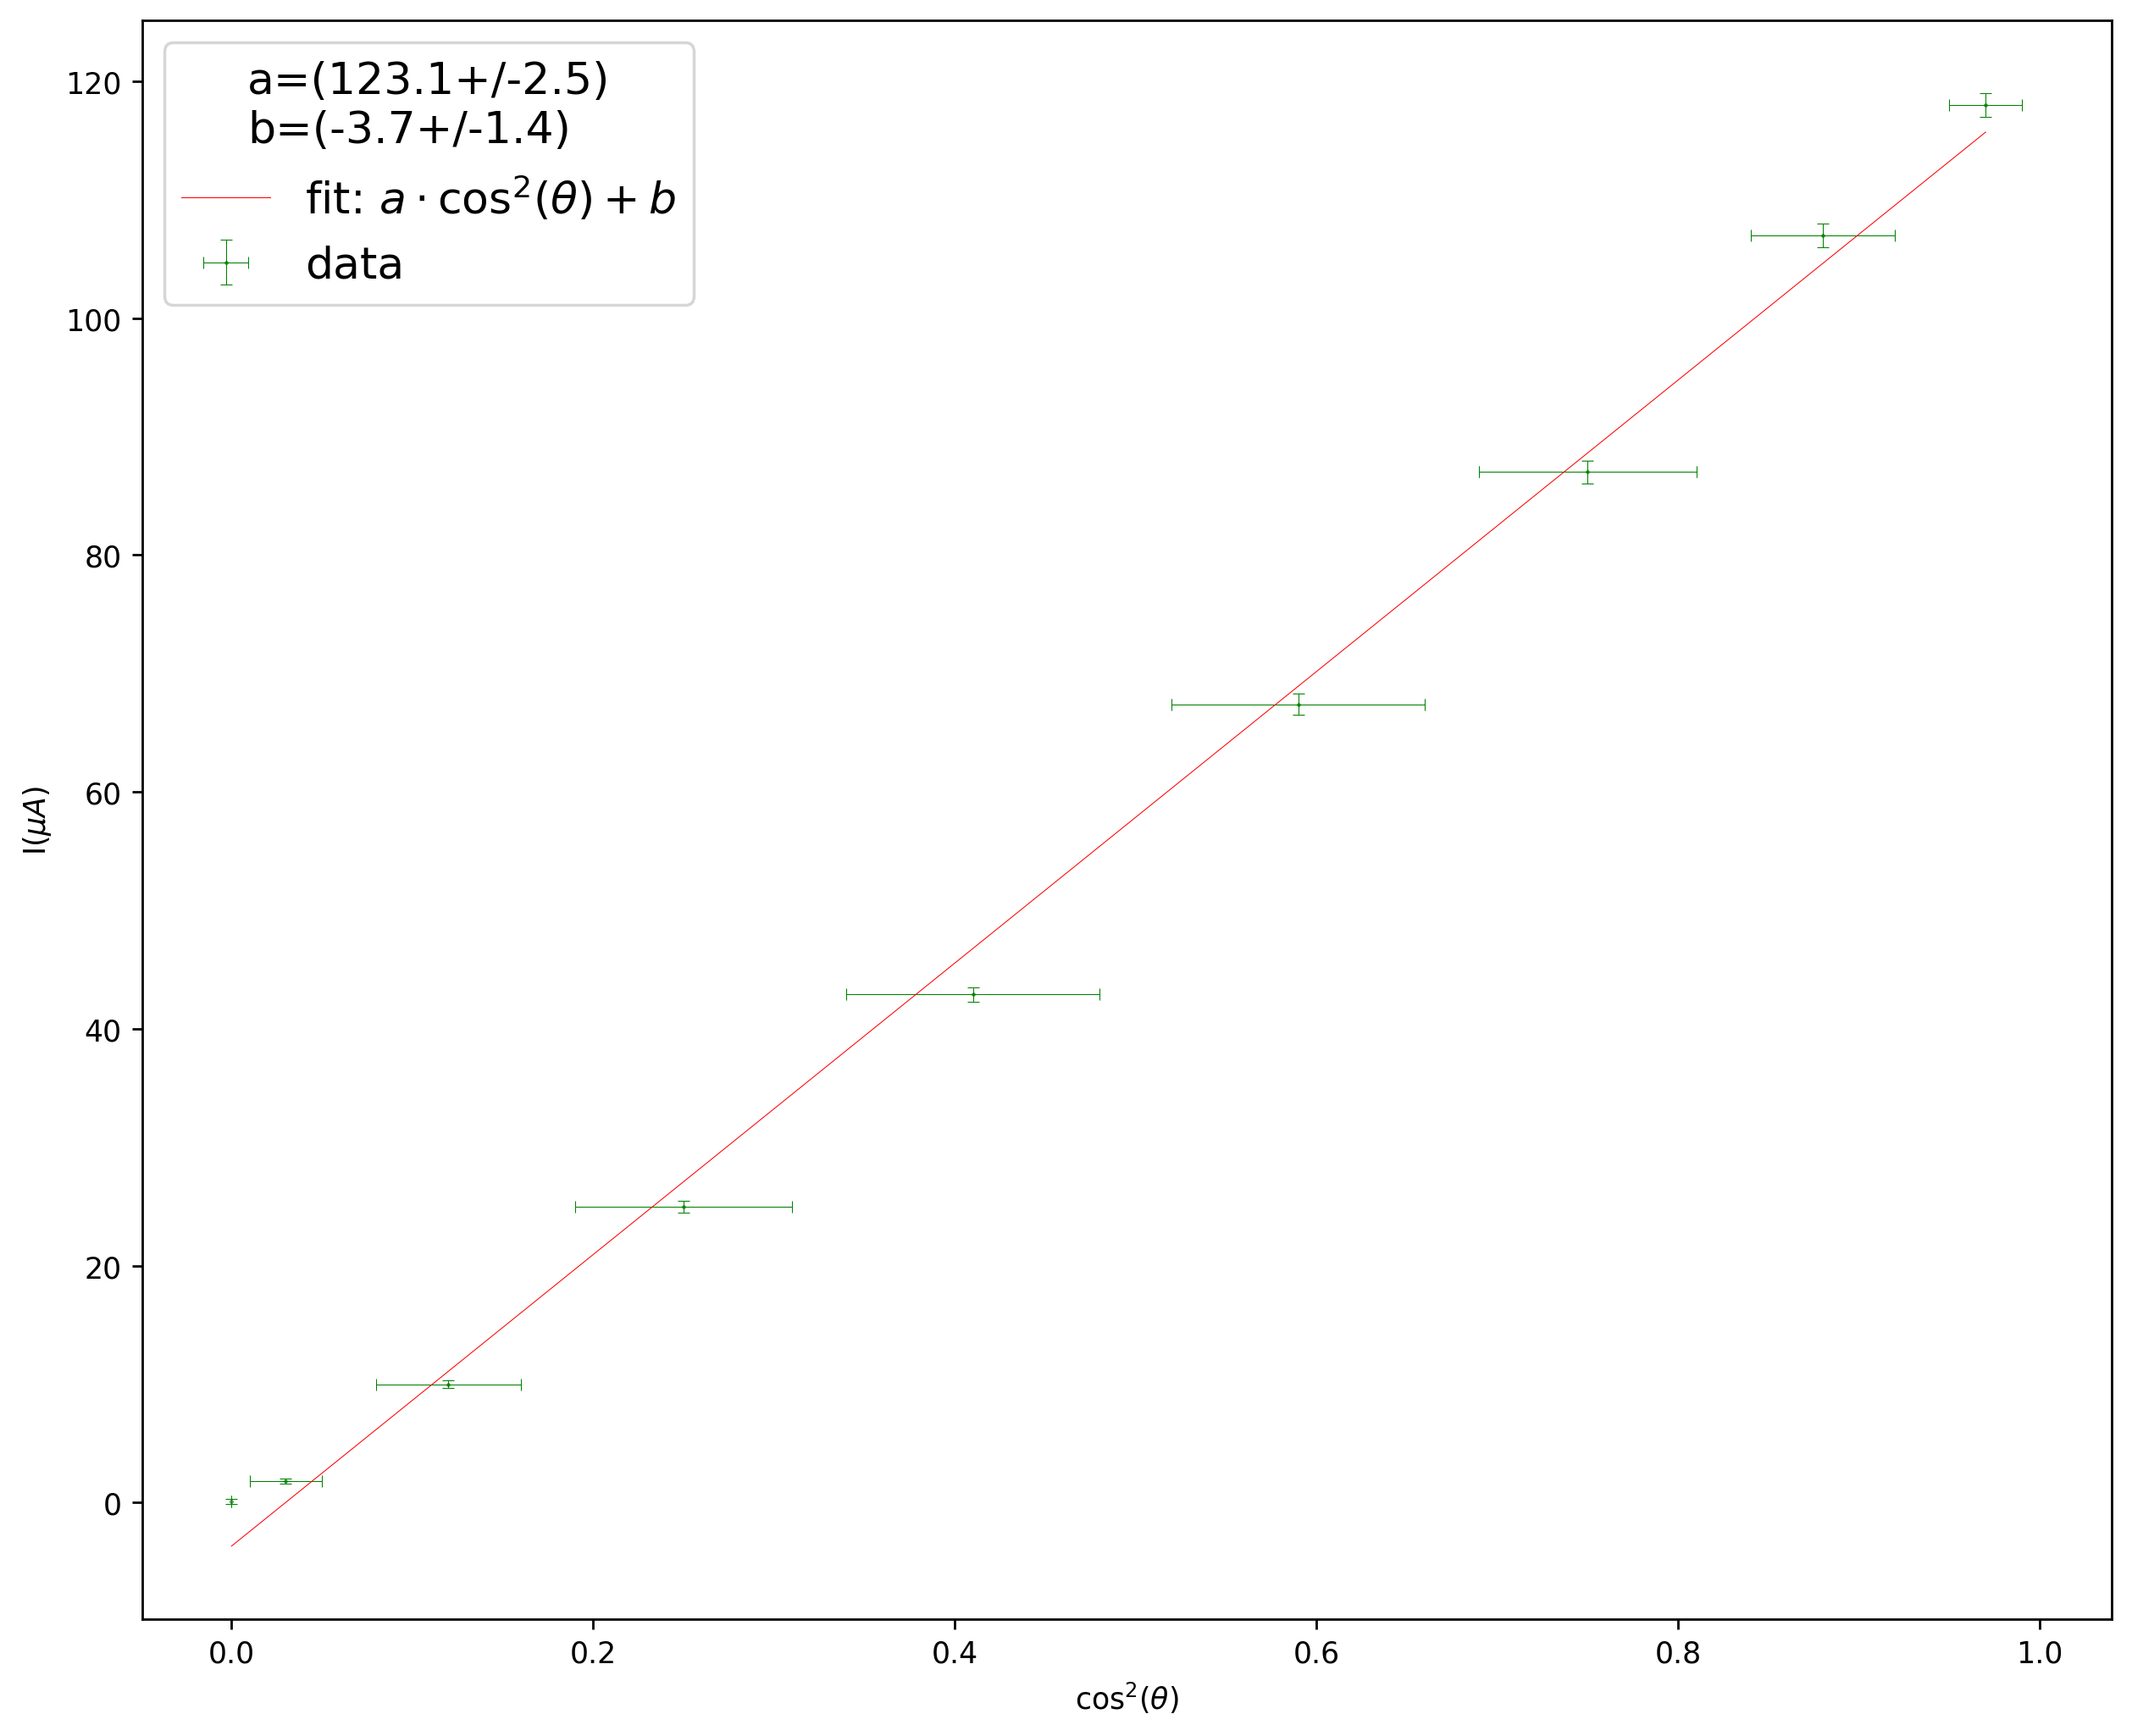

In [8]:
fname1='i_vs_theta.txt'
data1=np.loadtxt(fname1,dtype=float,comments='#')
I=data1[:,1]
errI = rs(I*0.01+2*0.1,1)
I[:-1]=reb(I[:-1],errI[:-1])
Theta = data1[:,0]
Cos = [angle.cos(angle(a, 0)) for a in Theta]
cos_np = np.array(Cos)
cos2 = cos_np**2
errcos2 = np.array([2*angle.cos(angle(theta, 0))*angle.sin(angle(theta, 0))*4/180*np.pi for theta in Theta])
errcos2[errcos2!=0]=rs(errcos2[errcos2!=0],1)
cos2[(cos2!=0)&(errcos2!=0)]=reb(cos2[(cos2!=0)&(errcos2!=0)],errcos2[(cos2!=0)&(errcos2!=0)])
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(np.transpose(np.vstack([cos2, I])))
print('a=({:.1f}+/-{:.1f})'.format(a, sigmaa), 'b=({:.1f}+/-{:.1f})'.format(b, sigmab))
errtheta = 4



plt.figure(figsize=(12,10), dpi=250)
plt.errorbar(x=cos2, y=I, yerr=errI, xerr=errcos2, fmt="o", markersize=0.3, capsize=2, linewidth=0.3, capthick=0.3, color='green', label='data')
plt.plot(cos2, a*np.array(cos2)+b, c='red', lw=0.3, label=r'fit: $a\cdot \cos^2(\theta) + b$')
plt.ylabel(r'I$(\mu A)$')
plt.xlabel(r'$\cos^2(\theta)$')
fit_info = [r'a=({:.1f}+/-{:.1f})'.format(a, sigmaa), r'b=({:.1f}+/-{:.1f})'.format(b, sigmab)]
info = '\n'.join(fit_info)
plt.legend(title=info, fontsize=15, title_fontsize=15)
plt.show()


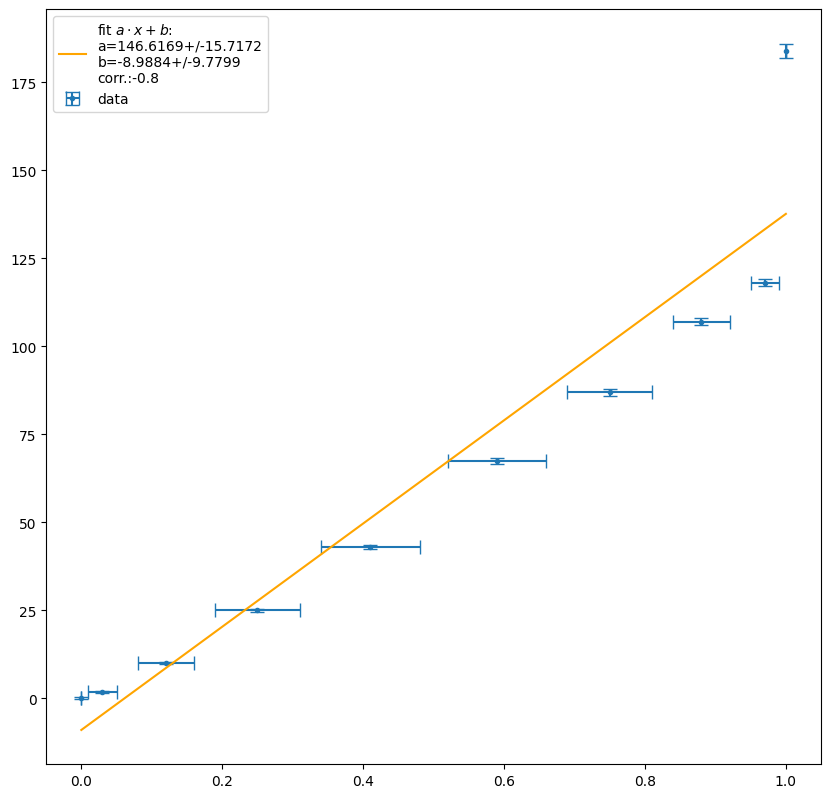

      x            ex      y   ey
9  0.00  9.000000e-18    0.1  0.2
8  0.03  2.000000e-02    1.8  0.2
7  0.12  4.000000e-02   10.0  0.3
6  0.25  6.000000e-02   25.0  0.5
5  0.41  7.000000e-02   42.9  0.6
4  0.59  7.000000e-02   67.4  0.9
3  0.75  6.000000e-02   87.0  1.0
2  0.88  4.000000e-02  107.0  1.0
1  0.97  2.000000e-02  118.0  1.0
0  1.00  0.000000e+00  184.0  2.0


In [7]:
plot(cos2,I,errcos2,errI,fit=True)

In [8]:
a = 2.682
b = 20.114
c = 0.655
lamb = 0.650
rho = a + b/lamb**2+c/lamb**4
print('rho = {}'.format(rho))

rho = 53.95843990056371


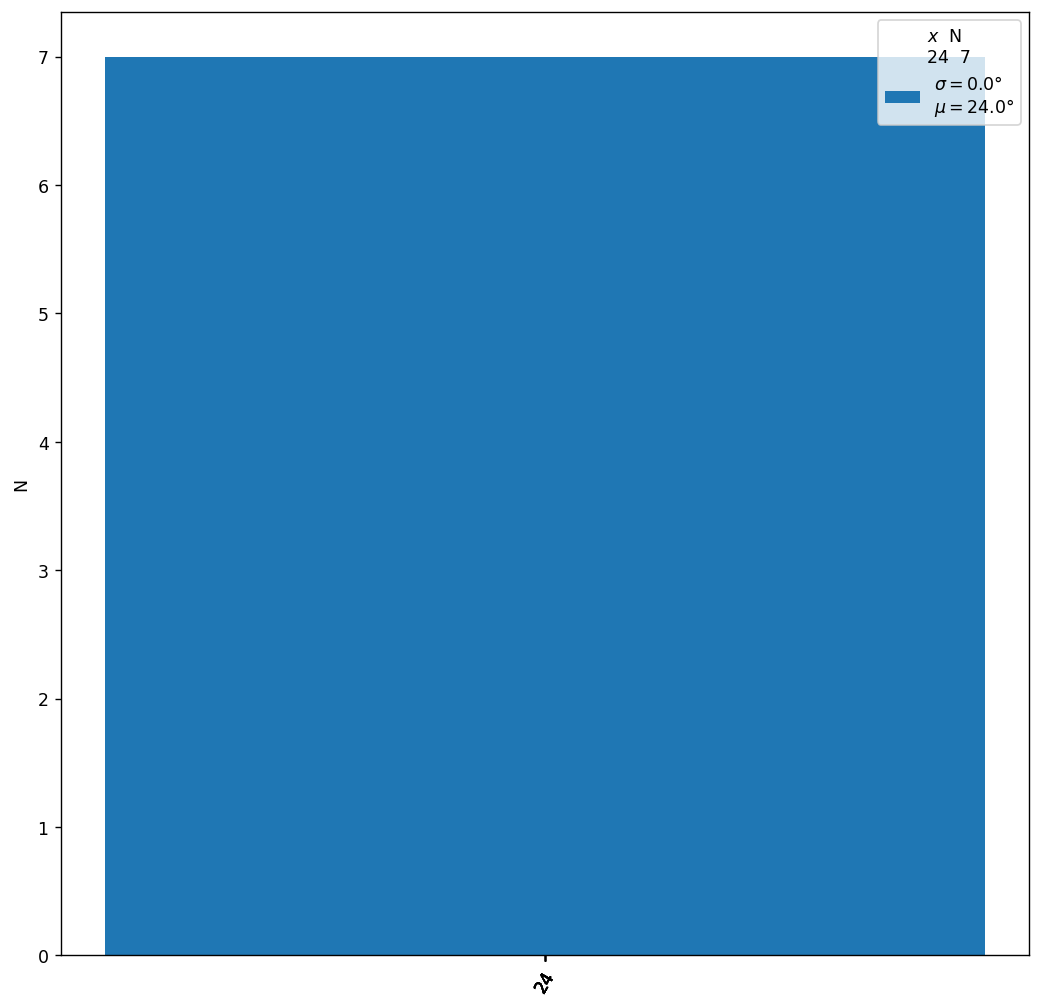

Inserire errore theta1: 4
1-->stat  0-->max   :0
theta1: 24.0+/-4.0
concentrazione 1 = (0.44+-0.07)g/cm^3


In [12]:
fnamedelta1='delta1.txt'
D1=np.loadtxt(fnamedelta1,dtype=float,comments='#')
deltas1 = D1[:,0]

theta1,s1=labhist(deltas1,w=1)

L=1
errL = 0.1
errtheta1 = float(input('Inserire errore theta1: '))
boolean1=int(input('1-->stat  0-->max   :'))
theta1=reb(theta1,errtheta1)
c1 = theta1/(rho*L)
if boolean1==1:
    deltac1 = (3*errtheta1/L + errL*theta1/L**2)/rho
elif boolean1==0:
    deltac1 = (errtheta1/L + errL*c1/L**2)/rho
deltac1=rs(deltac1,1)
c1=reb(c1,deltac1)
print('theta1: {}+/-{}'.format(theta1,errtheta1))
print('concentrazione 1 = ({:.2f}+-{:.2f})g/cm^3'.format(c1, deltac1))

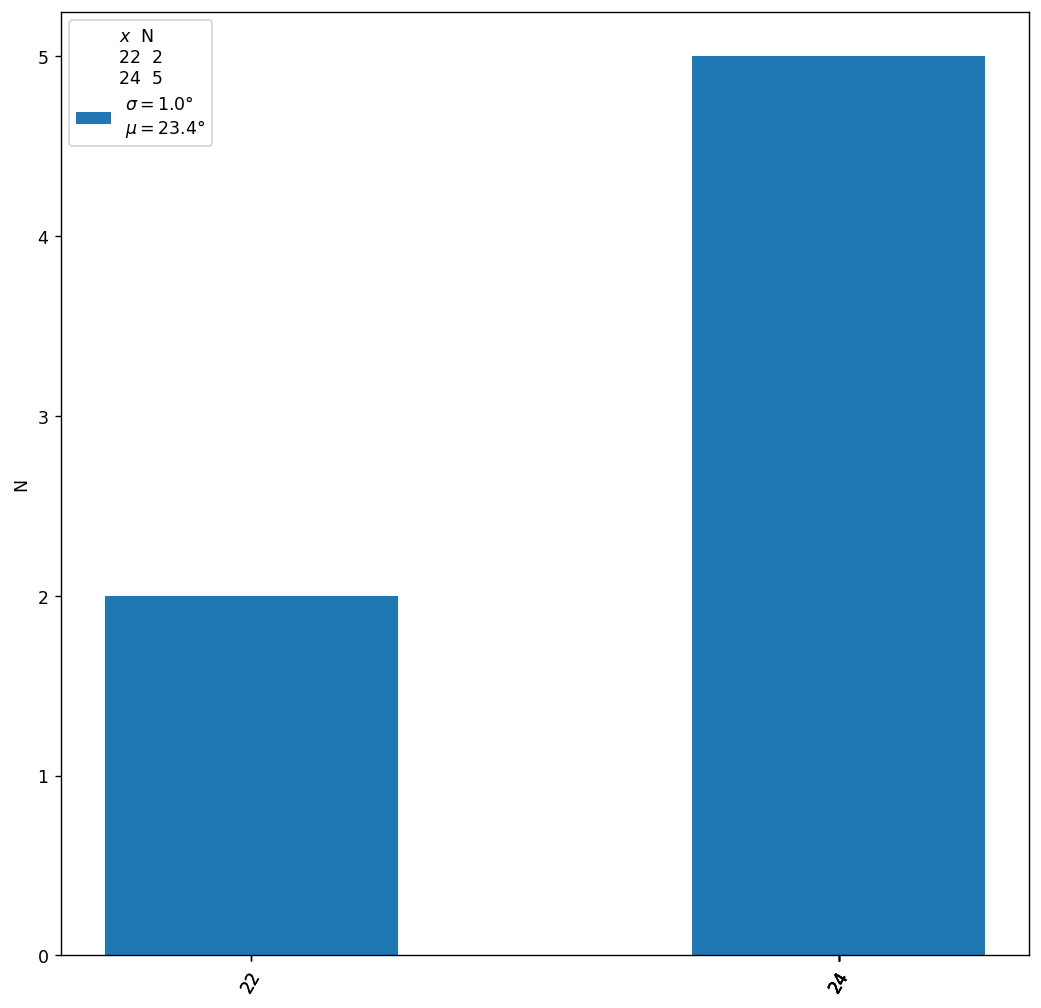

Inserire errore theta1: 1
1-->stat  0-->max   :1
theta2: 23.0+/-1.0
concentrazione 2 = (0.40+-0.10)g/cm^3


In [14]:
fnamedelta2='delta2.txt'
D2=np.loadtxt(fnamedelta2,dtype=float,comments='#')
deltas2 = D2[:,0]

errtheta2 = float(input('Inserire errore theta1: '))
boolean2=int(input('1-->stat  0-->max   :'))
theta2=reb(theta2,errtheta2)
c2=theta2/(rho*L)
if boolean2==1:
    deltac2 = (3*errtheta2/L + errL*theta2/L**2)/rho
elif boolean2==0:
    deltac2 = (errtheta2/L + errL*c2/L**2)/rho
deltac2=rs(deltac2,1)

c2=reb(c2,deltac2)
print('theta2: {}+/-{}'.format(theta2,errtheta2))
print('concentrazione 2 = ({:.2f}+-{:.2f})g/cm^3'.format(c2, deltac2))

In [ ]:
C = (c1+c2)/2
errC = (deltac1 + deltac2)/2
print('miglior stima di c = {:.2f}+-{:.2f}'.format(C, errC))